<a href="https://colab.research.google.com/github/oskar-kaluza-pjatk/1_semestr_EWD_Prezentacja/blob/main/EWD_prezentacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Wczytanie danych

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dane/motywacja.csv')

# Wrangling


In [ ]:
df.shape

(14124, 55)

In [ ]:
df.columns

Index(['Sygnatura czasowa', 'Podaj płeć ', 'Wiek', 'Wybierz województwo',
       'Podaj wielkość swojego miasta/gminy ', 'Twoje główne źródło dochodu',
       'Wykształcenie', 'Staż pracy', 'W jakim charakterze pracujesz? ',
       'Zarobki netto (do ręki)',
       'Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?',
       'Akcje/obligacje/udziały w zyskach firmy',
       'Bilety na imprezy kulturalne i sportowe ', 'Bony towarowe',
       'Ciekawa i urozmaicona praca', 'Darmowy bufet firmowy',
       'Dobra atmosfera w miejscu pracy',
       'Docenianie działań przez przełożonych ',
       'Dodatkowe ubezpieczenie na życie', 'Dodatkowe ubezpieczenie zdrowotne',
       'Elastyczny czas pracy', 'Jasna ścieżka awansu',
       'Karty i kupony umożliwiające korzystanie z obiektów sportowych i rekreacyjnych ',
       'Kredyt dla pracowników na preferencyjnych warunkach',
       'Laptop służbowy', 'Mieszkanie służbowe',
       'Możliwość samodzielnego podejmowania decyzji',
       

In [ ]:
start=df['Sygnatura czasowa'].iloc[1].split(' ')[0]
stop=df['Sygnatura czasowa'].iloc[-1].split(' ')[0]
trwalo=datetime.strptime(stop, "%Y/%m/%d") - datetime.strptime(start, "%Y/%m/%d")
print(f"Badanie było przeprowadzone pomiędzy {start} a {stop} i trwalo {trwalo.days} dni")


Badanie było przeprowadzone pomiędzy 2021/06/15 a 2022/04/02 i trwalo 291 dni


In [ ]:
df = df.rename(columns={'Podaj płeć ': 'Płeć'})
df=df.drop(['Sygnatura czasowa'], axis=1)
df.head()



,Płeć,Wiek,Wybierz województwo,Podaj wielkość swojego miasta/gminy,Twoje główne źródło dochodu,Wykształcenie,Staż pracy,W jakim charakterze pracujesz?,Zarobki netto (do ręki),Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?,...,"Szkolenia, studia, kursy",Telefon służbowy,"Udział, bądź realizacja ambitnych zadań, celów i projektów",Wyjazdy i imprezy integracyjne,Wysokość płacy zasadniczej,Zagrożenie przeniesienia na gorsze stanowisko,Zagrożenie utratą pracy,Znikomy poziom stresu,Zniżki na produkty i usługi firmowe,Zwrot za dojazdy do miejsca pracy
0,Mężczyzna,37.0,Świętokrzyskie,Od 20 tyś. do 50 tyś. mieszkańców,Bezrobotny/-a,Wyższe,Od 10 do 20 lat,NaN,NaN,NaN,...,10,3,10,1,8,2,1,8,5,6
1,Kobieta,47.0,Świętokrzyskie,Powyżej 100 tyś. mieszkańców,Praca na pełen etat,Wyższe,Powyżej 20 lat,Specjalisty,Pomiędzy 4 000 zł. a 5 000 zł.,Tak,...,1,1,1,2,1,1,8,7,1,1
2,Mężczyzna,30.0,Mazowieckie,Powyżej 100 tyś. mieszkańców,Praca na pełen etat,Wyższe,Od 3 do 10 lat,Kierownika/Menadżer,Pomiędzy 5 000 zł. a 6 000 zł.,Tak,...,7,1,9,2,9,1,1,8,1,7
3,Kobieta,25.0,Mazowieckie,Powyżej 100 tyś. mieszkańców,Praca na pełen etat,Wyższe,Od 3 do 10 lat,Pracownika umysłowego (pracownik szeregowy),Pomiędzy 5 000 zł. a 6 000 zł.,Tak,...,1,1,2,1,10,1,1,1,1,5
4,Kobieta,25.0,Świętokrzyskie,Powyżej 100 tyś. mieszkańców,Praca na pełen etat,Wyższe,Do 3 lat,Pracownika umysłowego (pracownik szeregowy),Pomiędzy 2 000 zł. a 3 000 zł.,Nie,...,10,5,8,8,10,1,1,9,5,8


In [ ]:
df_kasa=df.iloc[:, [0, 8,9]]
df_kasa=df_kasa.dropna()
df_kasa.head()



,Płeć,Zarobki netto (do ręki),Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?
1,Kobieta,Pomiędzy 4 000 zł. a 5 000 zł.,Tak
2,Mężczyzna,Pomiędzy 5 000 zł. a 6 000 zł.,Tak
3,Kobieta,Pomiędzy 5 000 zł. a 6 000 zł.,Tak
4,Kobieta,Pomiędzy 2 000 zł. a 3 000 zł.,Nie
5,Kobieta,Pomiędzy 4 000 zł. a 5 000 zł.,Nie


In [ ]:
kobiety_kasa=df_kasa[df_kasa['Płeć'] == 'Kobieta']
mezczyzna_kasa=df_kasa[df_kasa['Płeć'] == 'Mężczyzna']
print(kobiety_kasa.shape)
print(mezczyzna_kasa.shape)

(9659, 3)
(2280, 3)


In [ ]:
mezczyzna_kasa = mezczyzna_kasa.groupby('Zarobki netto (do ręki)')['Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?'].value_counts().unstack()
mezczyzna_kasa



Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?,Nie,Tak
Zarobki netto (do ręki),,
Do 1000 zł.,31,36
Pomiędzy 1 000 zł. a 2 000 zł.,72,88
Pomiędzy 10 000 zł. a 11 000 zł.,12,26
Pomiędzy 11 000 zł. a 12 000 zł.,11,18
Pomiędzy 12 000 zł. a 13 000 zł.,4,14
Pomiędzy 13 000 zł. a 14 000 zł.,4,5
Pomiędzy 14 000 zł. a 15 000 zł.,6,7
Pomiędzy 2 000 zł. a 3 000 zł.,298,182
Pomiędzy 3 000 zł. a 4 000 zł.,298,241


In [ ]:
kobiety_kasa = kobiety_kasa.groupby('Zarobki netto (do ręki)')['Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?'].value_counts().unstack()
kobiety_kasa



Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?,Nie,Tak
Zarobki netto (do ręki),,
Do 1000 zł.,162,181
Pomiędzy 1 000 zł. a 2 000 zł.,664,565
Pomiędzy 10 000 zł. a 11 000 zł.,14,27
Pomiędzy 11 000 zł. a 12 000 zł.,9,18
Pomiędzy 12 000 zł. a 13 000 zł.,7,9
Pomiędzy 13 000 zł. a 14 000 zł.,2,4
Pomiędzy 14 000 zł. a 15 000 zł.,4,8
Pomiędzy 2 000 zł. a 3 000 zł.,2157,1127
Pomiędzy 3 000 zł. a 4 000 zł.,1508,973


In [ ]:
zarobki_kategorie = [
    "Do 1000 zł.",
    "Pomiędzy 1 000 zł. a 2 000 zł.",
    "Pomiędzy 2 000 zł. a 3 000 zł.",
    "Pomiędzy 3 000 zł. a 4 000 zł.",
    "Pomiędzy 4 000 zł. a 5 000 zł.",
    "Pomiędzy 5 000 zł. a 6 000 zł.",
    "Pomiędzy 6 000 zł. a 7 000 zł.",
    "Pomiędzy 7 000 zł. a 8 000 zł.",
    "Pomiędzy 8 000 zł. a 9 000 zł.",
    "Pomiędzy 9 000 zł. a 10 000 zł.",
    "Pomiędzy 10 000 zł. a 11 000 zł.",
    "Pomiędzy 11 000 zł. a 12 000 zł.",
    "Pomiędzy 12 000 zł. a 13 000 zł.",
    "Pomiędzy 13 000 zł. a 14 000 zł.",
    "Pomiędzy 14 000 zł. a 15 000 zł.",
    "Powyżej 15 000 zł."
]

In [ ]:
mezczyzna_kasa=mezczyzna_kasa.reindex(zarobki_kategorie) #Zmiana kolejności w indeksach
#Zamiana na procenty (dodanie kolumny)
mezczyzna_kasa['Procent_Tak'] = (mezczyzna_kasa['Tak'] / (mezczyzna_kasa['Tak'] + mezczyzna_kasa['Nie'])) * 100
mezczyzna_kasa['Procent_Nie'] = (mezczyzna_kasa['Nie'] / (mezczyzna_kasa['Tak'] + mezczyzna_kasa['Nie'])) * 100
mezczyzna_kasa['Procent_zarobki'] = ((mezczyzna_kasa['Tak'] + mezczyzna_kasa['Nie']) / (mezczyzna_kasa['Tak'] + mezczyzna_kasa['Nie']).sum()) * 100
mezczyzna_kasa



Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?,Nie,Tak,Procent_Tak,Procent_Nie,Zarobki,Procent_zarobki
Zarobki netto (do ręki),,,,,,
Do 1000 zł.,31,36,53.731343,46.268657,1000,2.938596
Pomiędzy 1 000 zł. a 2 000 zł.,72,88,55.000000,45.000000,2000,7.017544
Pomiędzy 2 000 zł. a 3 000 zł.,298,182,37.916667,62.083333,3000,21.052632
Pomiędzy 3 000 zł. a 4 000 zł.,298,241,44.712430,55.287570,4000,23.640351
Pomiędzy 4 000 zł. a 5 000 zł.,164,190,53.672316,46.327684,5000,15.526316
Pomiędzy 5 000 zł. a 6 000 zł.,89,83,48.255814,51.744186,6000,7.543860
Pomiędzy 6 000 zł. a 7 000 zł.,41,85,67.460317,32.539683,7000,5.526316
Pomiędzy 7 000 zł. a 8 000 zł.,34,40,54.054054,45.945946,8000,3.245614
Pomiędzy 8 000 zł. a 9 000 zł.,24,32,57.142857,42.857143,9000,2.456140


In [ ]:
kobiety_kasa=kobiety_kasa.reindex(zarobki_kategorie) #Zmiana kolejności w indeksach
#Zamiana na procenty (dodanie kolumny)
kobiety_kasa['Procent_Tak'] = (kobiety_kasa['Tak'] / (kobiety_kasa['Tak'] + kobiety_kasa['Nie'])) * 100
kobiety_kasa['Procent_Nie'] = (kobiety_kasa['Nie'] / (kobiety_kasa['Tak'] + kobiety_kasa['Nie'])) * 100
kobiety_kasa['Procent_zarobki'] = ((kobiety_kasa['Tak'] + kobiety_kasa['Nie']) / (kobiety_kasa['Tak'] + kobiety_kasa['Nie']).sum()) * 100
kobiety_kasa

Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?,Nie,Tak,Procent_Tak,Procent_Nie,Zarobki,Procent_zarobki
Zarobki netto (do ręki),,,,,,
Do 1000 zł.,162,181,52.769679,47.230321,1000,3.551092
Pomiędzy 1 000 zł. a 2 000 zł.,664,565,45.972335,54.027665,2000,12.723884
Pomiędzy 2 000 zł. a 3 000 zł.,2157,1127,34.317905,65.682095,3000,33.999379
Pomiędzy 3 000 zł. a 4 000 zł.,1508,973,39.218057,60.781943,4000,25.685889
Pomiędzy 4 000 zł. a 5 000 zł.,611,497,44.855596,55.144404,5000,11.471167
Pomiędzy 5 000 zł. a 6 000 zł.,249,246,49.696970,50.303030,6000,5.124754
Pomiędzy 6 000 zł. a 7 000 zł.,123,122,49.795918,50.204082,7000,2.536494
Pomiędzy 7 000 zł. a 8 000 zł.,51,90,63.829787,36.170213,8000,1.459778
Pomiędzy 8 000 zł. a 9 000 zł.,29,57,66.279070,33.720930,9000,0.890361


In [ ]:
kobiety_kasa['Zarobki']=list(range(1_000,17_000,1_000))
mezczyzna_kasa['Zarobki']=list(range(1_000,17_000,1_000))

# Wykresy

In [ ]:
def wykres_zarobki(ramka1,ramka2):
  plt.plot(ramka1.index,ramka1['Procent_zarobki'], color='lightblue', label=f'Wykres procentowy zarobków Kobiet')
  plt.plot(ramka2.index,ramka2['Procent_zarobki'], color='lightcoral', label=f'Wykres procentowy zarobków Mężczyzn')
  plt.xlabel('Wynagrodzenie')
  plt.xticks(ramka1.index, rotation='vertical')
  plt.ylabel('Procenty')
  plt.legend()
  return plt.show()

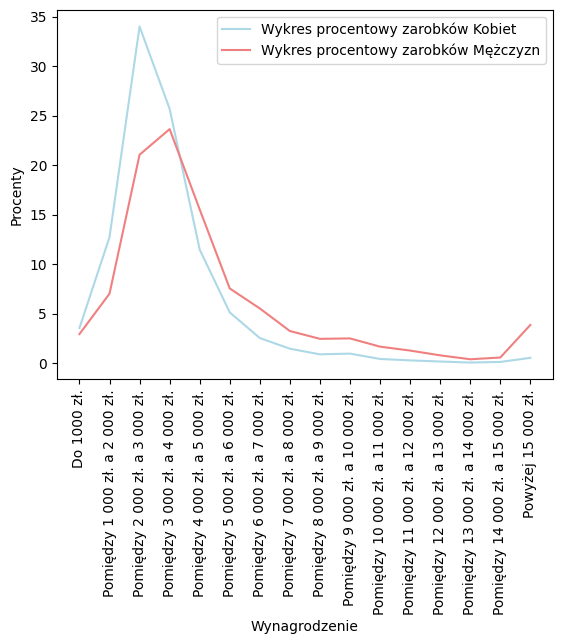

In [ ]:
wykres_zarobki(kobiety_kasa,mezczyzna_kasa)

In [ ]:
def wykres_pusty(ramka):
  #plt.figure(figsize=(8, 8))

  plt.bar(ramka.index, ramka['Procent_Tak'], color='blue', label='Procent Tak')
  plt.bar(ramka.index, ramka['Procent_Nie'], color='red', label='Procent Nie', bottom=ramka['Procent_Tak'])

  plt.xlabel('Wynagrodzenie')
  plt.xticks(ramka.index, rotation='vertical')
  plt.ylabel('Procenty')
  plt.legend()

  return plt.show()

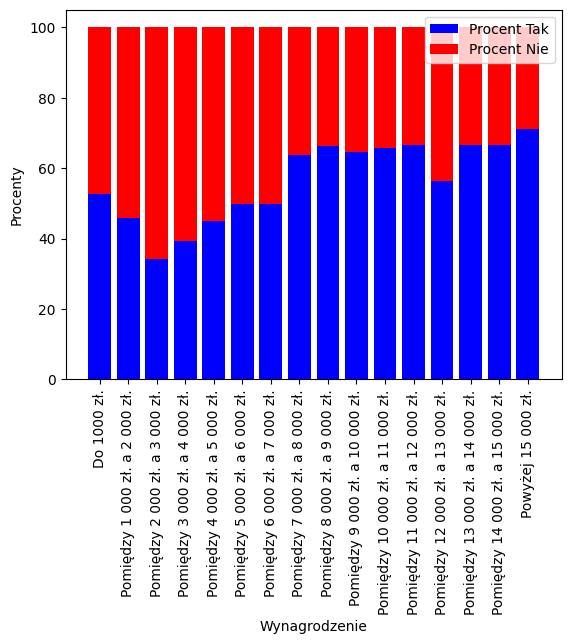

In [ ]:
wykres_pusty(kobiety_kasa)

In [ ]:
def wykres_regresja(ramka):
  #regresja_liniowa
  X = ramka['Zarobki'].values.reshape(-1, 1)
  y = ramka['Procent_Tak'].values
  regressor = LinearRegression()
  regressor.fit(X, y)
  predykcja = regressor.predict(X)
  #Miary
  r_squared = r2_score(y, predykcja)
  rmse = mean_squared_error(y, predykcja, squared=False)


  #Wykres
  plt.bar(ramka.index, ramka['Procent_Tak'], color='lightblue', label='Procent Tak')
  plt.bar(ramka.index, ramka['Procent_Nie'], color='lightcoral', label='Procent Nie', bottom=ramka['Procent_Tak'])
  plt.plot(ramka.index, predykcja, color='black', label='Regresja Liniowa', linestyle='--')

  plt.xlabel('Wynagrodzenie')
  plt.xticks(ramka.index, rotation='vertical')
  plt.ylabel('Procenty')
  plt.legend()

  plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 27, f'RMSE = {rmse:.2f}', ha='right', va='bottom', fontsize=10, color='black')
  plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 32, f'R^2 = {r_squared:.2f}', ha='right', va='bottom', fontsize=10, color='black')
  return plt.show()

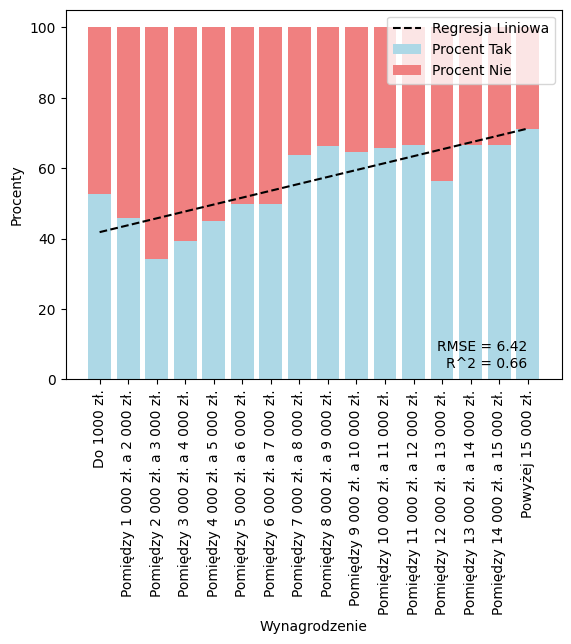

In [ ]:
wykres_regresja(kobiety_kasa)

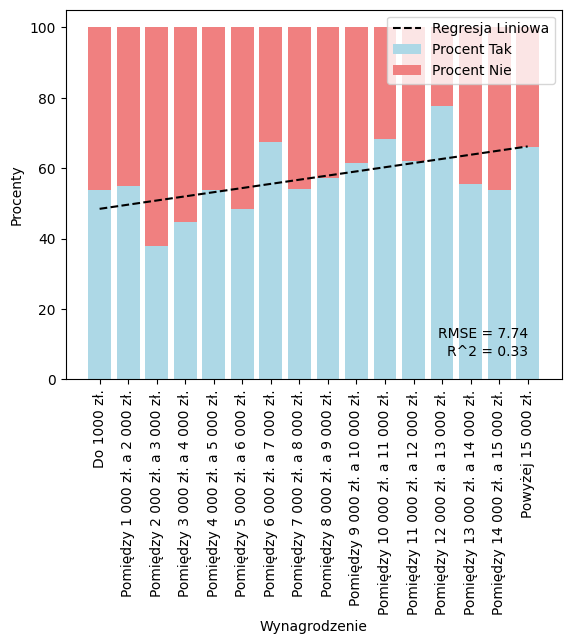

In [ ]:
wykres_regresja(mezczyzna_kasa)

In [ ]:
def wykres_regresja_reszty(ramka):

    if ramka=='kobiety_kasa':
      tytul='Wykres dla kobiet'
    elif ramka=='mezczyzna_kasa':
      tytul='Wykres dla mężczyzn'
    else:
      tytul='Wykres'

    ramka=eval(ramka)

    # regresja_liniowa
    X = ramka['Zarobki'].values.reshape(-1, 1)
    y = ramka['Procent_Tak'].values
    regressor = LinearRegression()
    regressor.fit(X, y)
    predykcja = regressor.predict(X)

    #Miary
    r_squared = r2_score(y, predykcja)
    rmse = mean_squared_error(y, predykcja, squared=False)
    reszty = y - predykcja
    mape = np.mean(np.abs((y - predykcja) / y)) * 100
    poczatek=predykcja[0]
    wzrost=np.mean(np.diff(predykcja))
    motywacja100 = 100
    b = regressor.intercept_
    a = regressor.coef_[0]
    wynagrodzenie_motywacja = (motywacja100 - b) / a

    #Wykres

    plt.figure(figsize=(7, 7))
    plt.bar(ramka.index, ramka['Procent_Tak'], color='lightblue', label='Procent Tak')
    plt.bar(ramka.index, ramka['Procent_Nie'], color='lightcoral', label='Procent Nie', bottom=ramka['Procent_Tak'])

    for i in range(len(ramka.index)):
        if reszty[i] >= 0:
            plt.plot([ramka.index[i], ramka.index[i]], [y[i], predykcja[i]], color='black', linestyle='-', linewidth=1)
            plt.text(ramka.index[i], max(y[i], predykcja[i]) + 2, f'{reszty[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black',rotation='vertical')
        else:
            plt.plot([ramka.index[i], ramka.index[i]], [y[i], predykcja[i]], color='black', linestyle='-', linewidth=1)
            plt.text(ramka.index[i], min(y[i], predykcja[i]) - 2, f'{reszty[i]:.2f}', ha='center', va='top', fontsize=10, color='black',rotation='vertical')

    plt.plot(ramka.index, predykcja, color='black', label='Regresja Liniowa', linestyle='--')

    plt.xlabel('Wynagrodzenie')
    plt.xticks(ramka.index, rotation='vertical')
    plt.ylabel('Procenty')
    plt.legend()
    plt.title(tytul)
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 14, f'Wartość wynagrodzenia dla 100% zadowolenia to {round(wynagrodzenie_motywacja,2)} złotych', ha='right', va='bottom', fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 19, f'Wartość początkowa = {poczatek:.2f} o średnim wzroście {wzrost:.2f}', ha='right', va='bottom', fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 23, f'MAPE = {mape:.2f}', ha='right', va='bottom', fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 28, f'RMSE = {rmse:.2f}', ha='right', va='bottom', fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 33, f'R^2 = {r_squared:.2f}', ha='right', va='bottom', fontsize=10, color='black')
    return plt.show()


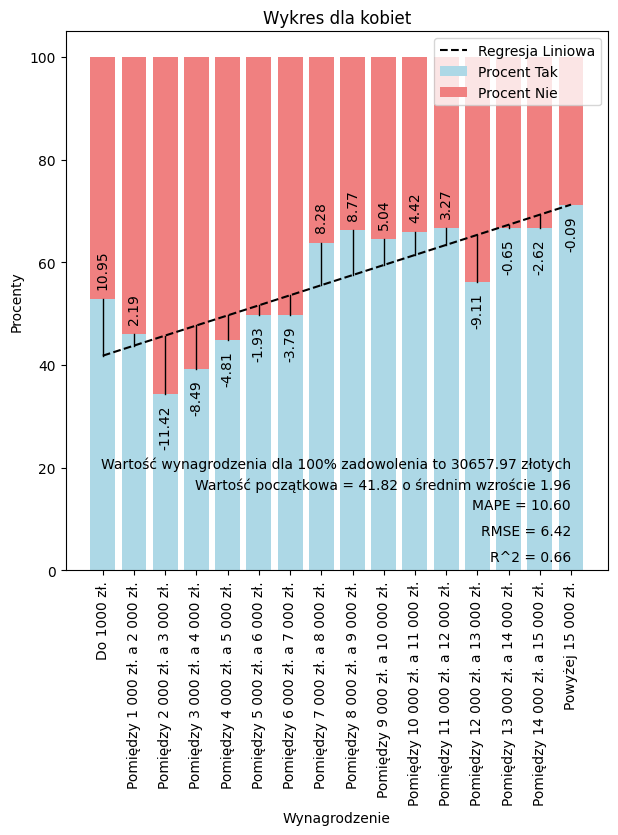

In [ ]:
wykres_regresja_reszty('kobiety_kasa')

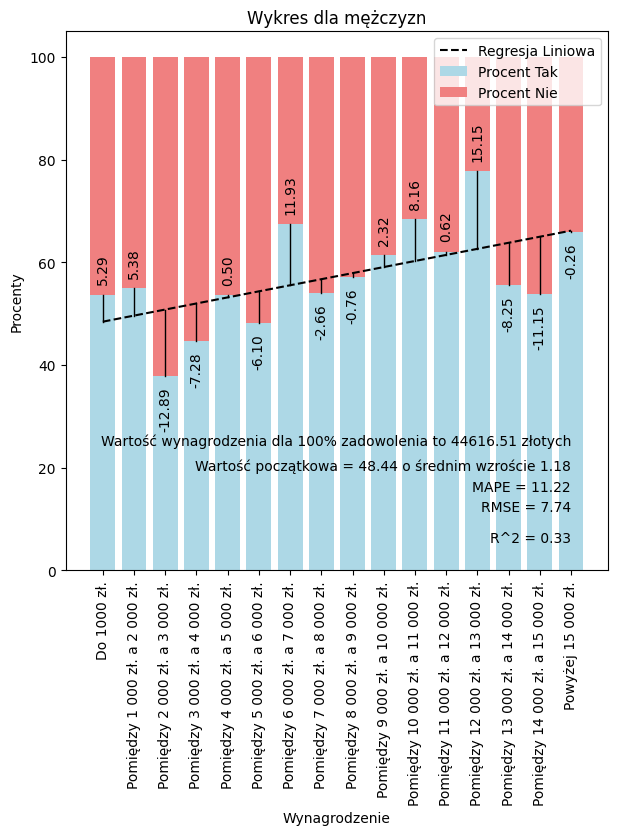

In [ ]:
wykres_regresja_reszty('mezczyzna_kasa')

In [ ]:
def poli_max(ramka,n=60):

    ramka = eval(ramka)
    X = ramka['Zarobki'].values.reshape(-1, 1)
    y = ramka['Procent_Tak'].values
    lista = []

    for i in range(n):
        wielomianowa = PolynomialFeatures(degree=i)
        X_wielo = wielomianowa.fit_transform(X)
        regressor = LinearRegression()
        regressor.fit(X_wielo, y)
        predykcja = regressor.predict(X_wielo)
        r_squared = r2_score(y, predykcja)
        lista.append(r_squared)

    return lista.index(max(lista))




In [ ]:
poli_max('kobiety_kasa')

4

In [ ]:
poli_max('mezczyzna_kasa')

10

In [ ]:
def poli_max_list(ramka,n=50):

    ramka = eval(ramka)
    X = ramka['Zarobki'].values.reshape(-1, 1)
    y = ramka['Procent_Tak'].values
    lista = []

    for i in range(n):
        wielomianowa = PolynomialFeatures(degree=i)
        X_wielo = wielomianowa.fit_transform(X)
        regressor = LinearRegression()
        regressor.fit(X_wielo, y)
        predykcja = regressor.predict(X_wielo)
        r_squared = r2_score(y, predykcja)
        lista.append(r_squared)
        df_list=pd.DataFrame(lista)
    return df_list


In [ ]:
poli_max_list('kobiety_kasa').idxmax()[0] #Indeks wartości maksymalnej

4

In [ ]:
poli_max_list('kobiety_kasa').iloc[poli_max_list('kobiety_kasa').idxmax()[0]][0] #Wartość maksymalna

0.9228508178502406

In [ ]:
def poli_max_wykres(ramka):
  index=poli_max_list(ramka).idxmax()[0]
  wartosc=poli_max_list(ramka).iloc[poli_max_list(ramka).idxmax()[0]][0]
  plt.plot(poli_max_list(ramka))
  plt.scatter(index,wartosc, color='red')
  plt.text(index +3, wartosc -0.05, f'Stopień wielomianu: {index} Wartość R^2: {wartosc:.2f}', fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')
  return plt.show()


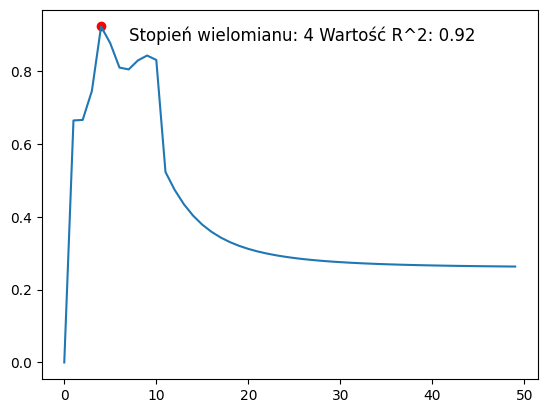

In [ ]:
poli_max_wykres('kobiety_kasa')

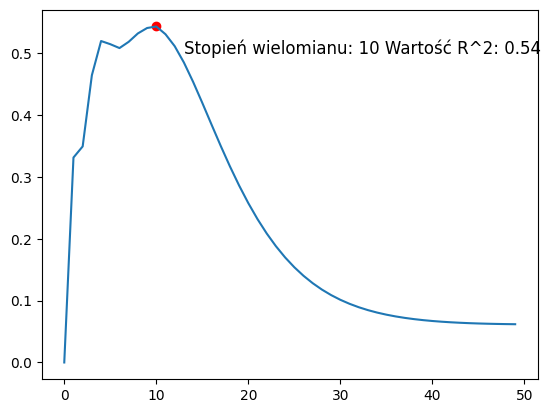

In [ ]:
poli_max_wykres('mezczyzna_kasa')

In [ ]:
def wykres_regresji_wielomianowej(ramka):
    stopien=poli_max(ramka)
    if ramka == 'kobiety_kasa':
        tytul = f'Wykres dla kobiet przy stopniu wielomianu wynoszącym {stopien}'
    elif ramka == 'mezczyzna_kasa':
        tytul = f'Wykres dla mężczyzn przy stopniu wielomianu wynoszącym {stopien}'
    else:
        tytul = f'Wykres przy stopniu wielomianu wynoszącym {stopien}'



    ramka = eval(ramka)

   #Zmienn
    X = ramka['Zarobki'].values.reshape(-1, 1)
    y = ramka['Procent_Tak'].values

    #Regresja wielomianowa
    wielomianowa = PolynomialFeatures(degree=stopien)
    X_wielo = wielomianowa.fit_transform(X)
    regressor = LinearRegression()
    regressor.fit(X_wielo, y)
    predykcja = regressor.predict(X_wielo)

    # Miary
    r_squared = r2_score(y, predykcja)
    rmse = mean_squared_error(y, predykcja, squared=False)
    reszty = y - predykcja
    mape = np.mean(np.abs((y - predykcja) / y)) * 100
    poczatek = predykcja[0]
    wzrost = np.mean(np.diff(predykcja))

    # Wykres
    plt.figure(figsize=(7, 7))
    plt.bar(ramka.index, ramka['Procent_Tak'], color='lightblue', label='Procent Tak')
    plt.bar(ramka.index, ramka['Procent_Nie'], color='lightcoral', label='Procent Nie', bottom=ramka['Procent_Tak'])

    for i in range(len(ramka.index)):
        if reszty[i] >= 0:
            plt.plot([ramka.index[i], ramka.index[i]], [y[i], predykcja[i]], color='black', linestyle='-', linewidth=1)
            plt.text(ramka.index[i], max(y[i], predykcja[i]) + 2, f'{reszty[i]:.2f}', ha='center', va='bottom', fontsize=10,
                     color='black', rotation='vertical')
        else:
            plt.plot([ramka.index[i], ramka.index[i]], [y[i], predykcja[i]], color='black', linestyle='-', linewidth=1)
            plt.text(ramka.index[i], min(y[i], predykcja[i]) - 2, f'{reszty[i]:.2f}', ha='center', va='top', fontsize=10,
                     color='black', rotation='vertical')

    plt.plot(ramka.index, predykcja, color='black', label='Regresja Wielomianowa', linestyle='--')

    plt.xlabel('Wynagrodzenie')
    plt.xticks(ramka.index, rotation='vertical')
    plt.ylabel('Procenty')
    plt.legend()
    plt.title(tytul)

    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 23, f'MAPE = {mape:.2f}', ha='right', va='bottom',
             fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 27, f'RMSE = {rmse:.2f}', ha='right', va='bottom',
             fontsize=10, color='black')
    plt.text(len(ramka.index) - 1, min(ramka['Procent_Tak']) - 33, f'R^2 = {r_squared:.2f}', ha='right', va='bottom',
             fontsize=10, color='black')
    return plt.show()


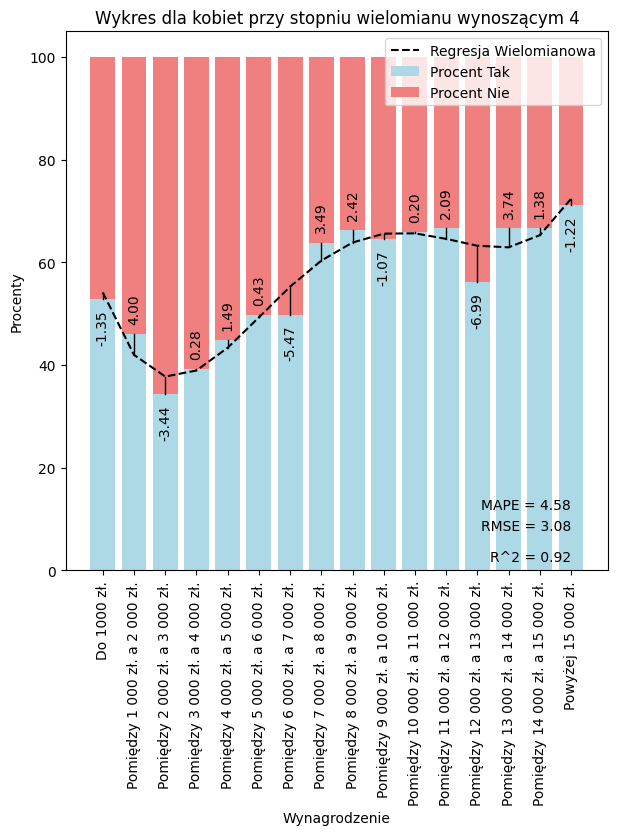

In [ ]:
wykres_regresji_wielomianowej('kobiety_kasa')

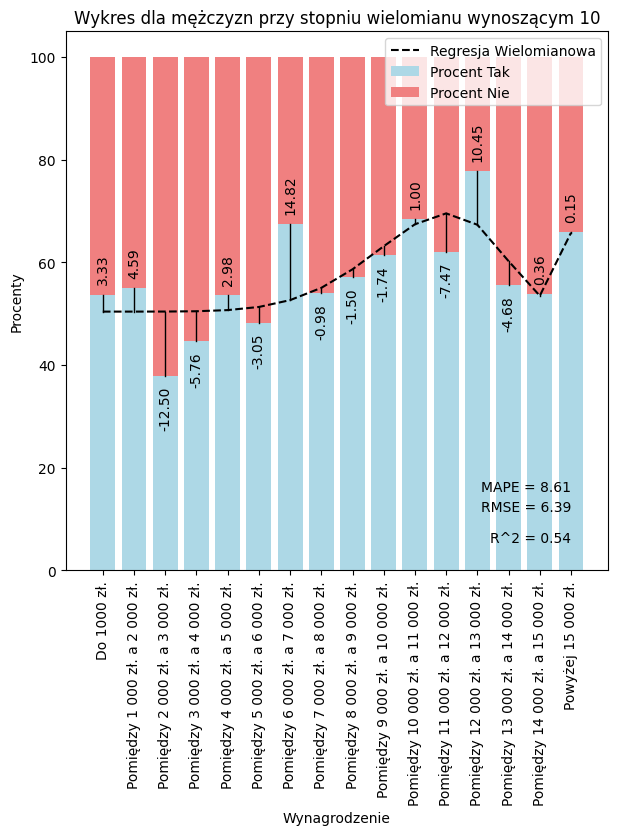

In [ ]:
wykres_regresji_wielomianowej('mezczyzna_kasa')